In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [56]:
# Read in the data
cars = pd.read_csv(r'C:\Users\amitr\OneDrive\Desktop\Elite\Data\secondary_car_market.csv', low_memory=False)
cars.head()

,maker,model,mileage,manufacture_year,transmission,door_count,seat_count,displacement,horse_power,price
0,audi,a8,136702.0,2006.0,auto,4.0,5.0,3.94,271.0,12285.0
1,audi,a3,102526.0,2004.0,man,4,5,1.97,138.0,5500.0
2,audi,a3,684.0,2016.0,auto,5.0,5.0,1.97,148.0,39649.0
3,audi,s7,38525.0,2013.0,auto,5.0,4.0,3.99,414.0,64233.0
4,audi,a1,45006.0,2010.0,man,3,4,1.60,103.0,16848.0


In [43]:
# Checking for missing values
cars.isnull().sum()

maker               0
model               0
mileage             0
manufacture_year    0
transmission        0
door_count          0
seat_count          0
displacement        0
horse_power         0
price               0
dtype: int64

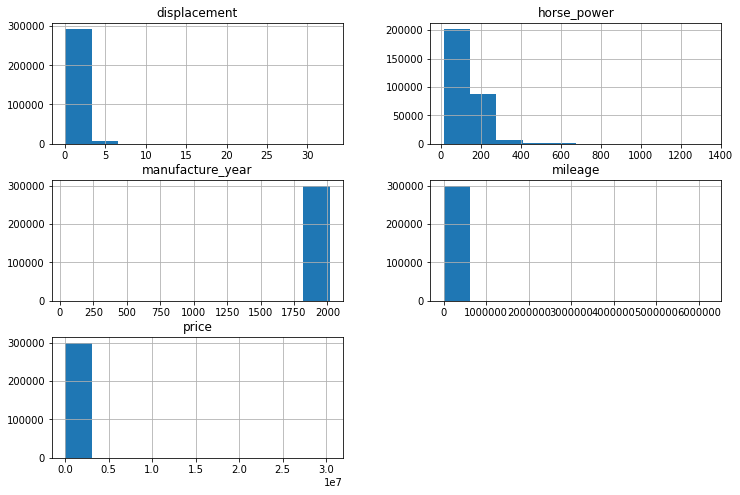

In [44]:
# check for the distribution of continuous variables
cars.hist(figsize=(12,8))
plt.show()

In [45]:
# Check for outliers
cars.describe()

,mileage,manufacture_year,displacement,horse_power,price
count,3.000000e+05,300000.000000,300000.000000,300000.000000,3.000000e+05
mean,6.373923e+04,2009.096253,1.876543,136.943660,1.660514e+04
std,8.628841e+04,16.946915,0.904341,63.155779,5.958110e+04
min,0.000000e+00,39.000000,0.010000,13.000000,0.000000e+00
25%,1.599200e+04,2006.000000,1.560000,101.000000,4.797000e+03
50%,5.591400e+04,2011.000000,1.900000,123.000000,1.345500e+04
75%,9.693400e+04,2014.000000,1.980000,154.000000,2.327100e+04
max,6.213709e+06,2017.000000,32.770000,1337.000000,3.042000e+07


In [46]:
# Check for outliers in displacement
cars.sort_values(by='displacement',ascending=False).head()

,maker,model,mileage,manufacture_year,transmission,door_count,seat_count,displacement,horse_power,price
216231,volkswagen,passat,120937.0,2011.0,man,4.0,5.0,32.77,138.0,1516.0
55310,audi,a3,127381.0,2004.0,auto,None,None,32.00,138.0,5153.0
56340,audi,200,139808.0,2008.0,man,None,None,32.00,168.0,9522.0
62867,audi,a3,127381.0,2004.0,auto,None,None,32.00,138.0,5153.0
81837,audi,s3,97555.0,2007.0,man,None,None,32.00,261.0,14203.0


In [47]:
cars.sort_values(by='displacement').head()

,maker,model,mileage,manufacture_year,transmission,door_count,seat_count,displacement,horse_power,price
10459,audi,a3,18952.0,2014.0,man,4.0,5.0,0.01,121.0,22622.0
103596,ford,fiesta,25476.0,2008.0,man,5.0,4.0,0.01,68.0,5265.0
245612,volkswagen,golf,14712.0,2015.0,man,5.0,5.0,0.02,148.0,24558.0
2236,audi,a3,9.0,2015.0,man,4,5,0.02,109.0,30734.0
199500,ford,mondeo,0.0,2015.0,auto,5.0,5.0,0.02,207.0,43875.0


In [48]:
upper_bound = cars.quantile(.99)
upper_bound

mileage             199021.66
manufacture_year      2016.00
displacement             4.16
horse_power            366.00
price                70189.04
Name: 0.99, dtype: float64

In [49]:
lower_bound = cars.quantile(0.01)
lower_bound

mileage                1.0
manufacture_year    1994.0
displacement           1.0
horse_power           59.0
price                866.0
Name: 0.01, dtype: float64

In [65]:
# Remove all outliers less than 1 percentile and 99 percentile
cars = cars[(cars.mileage >= lower_bound.mileage) & (cars.mileage <= upper_bound.mileage)]
cars = cars[(cars.displacement >= lower_bound.displacement) & (cars.displacement <= upper_bound.displacement)]
cars = cars[(cars.horse_power >= lower_bound.horse_power) & (cars.horse_power <= upper_bound.horse_power)]
cars = cars[(cars.price >= lower_bound.price) & (cars.price <= upper_bound.price)]
cars = cars[cars.manufacture_year >= lower_bound.manufacture_year]

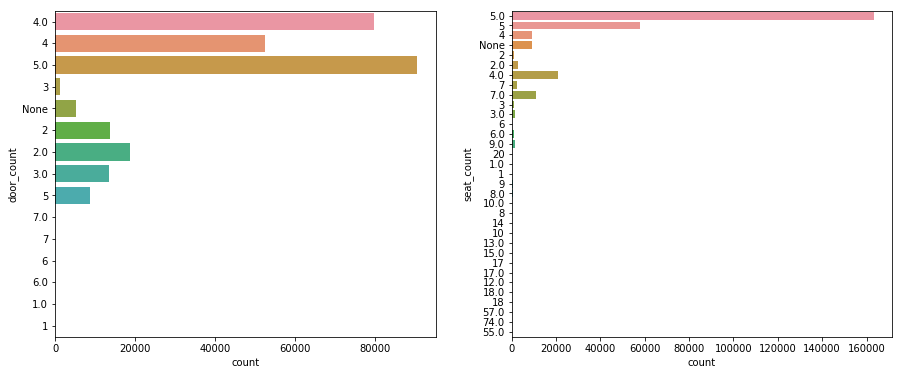

In [58]:
# Next we'll look at the door_count and seat_count

fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.countplot(y='door_count', data=cars, ax=ax[0])
sns.countplot(y='seat_count', data=cars, ax=ax[1])
plt.show()

In [59]:
# Fix the door and seat counts
cars = cars[(cars.door_count != 'None') & (cars.seat_count != 'None')]

In [61]:
cars['door_count'] = cars['door_count'].astype('float')
cars['seat_count'] = cars['seat_count'].astype('float')

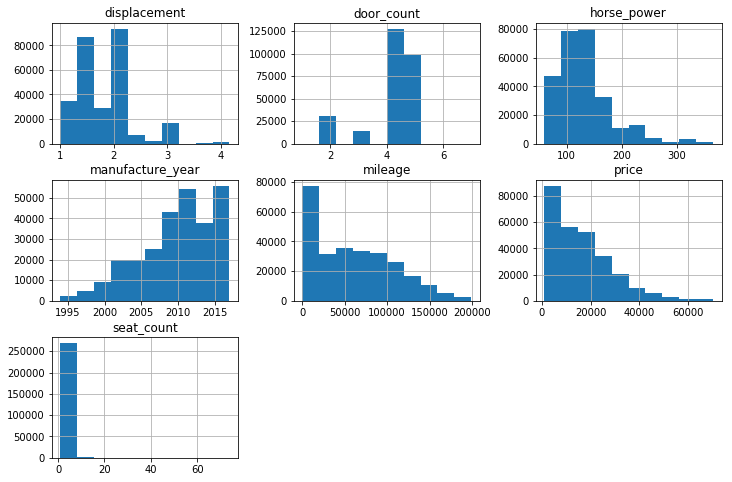

In [66]:
cars.hist(figsize=(12,8))
plt.show()

In [70]:
# Feature engineering
cars['Age'] = 2018 - cars['manufacture_year']
cars['New'] = (cars.mileage == 0) * 1
cars = cars.drop('manufacture_year', axis=1)

In [72]:
# Create dummy variables
df = pd.get_dummies(cars)

### Model Building (Random Forest)

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [82]:
y = df['price']
X = df.drop('price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123)

In [83]:
# Train a Random Forest model
reg = RandomForestRegressor(random_state=123)
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

In [92]:
# Predict the results
pred_train = reg.predict(X_train)
pred_test = reg.predict(X_test)

In [93]:
# Compare the results
print ("Training ==> R2 : ", r2_score(y_train, pred_train), "RMSE : ", np.sqrt(mean_squared_error(y_train, pred_train)))
print ("Test     ==> R2 : ", r2_score(y_test, pred_test), "RMSE : ", np.sqrt(mean_squared_error(y_test, pred_test)))

Training ==> R2 :  0.9733076308831369 RMSE :  2064.2564988981367
Test     ==> R2 :  0.8643271895245899 RMSE :  4628.903878590102


C:\Users\amitr\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\amitr\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


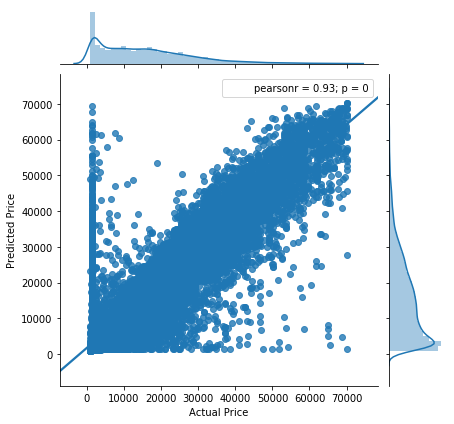

In [97]:
# Plot the model's performance
sns.jointplot(y_test, pred_test, kind='reg')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

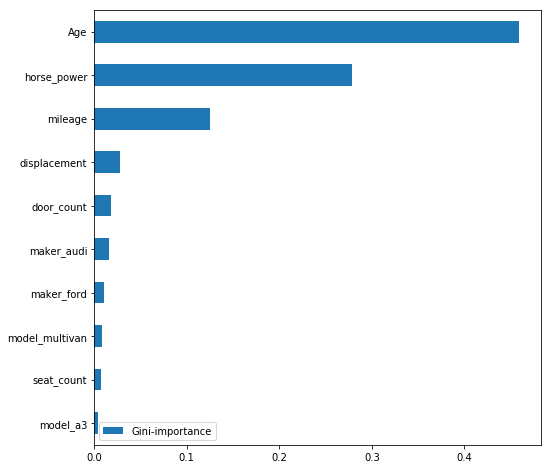

In [102]:
# Feature Importance
def plot_feature_importances(columns, feature_importances, show_top_n=10):
    feats = dict( zip(columns, feature_importances) )
    imp = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
    imp.sort_values(by='Gini-importance').tail(show_top_n).plot(kind='barh', figsize=(8,8))
    plt.show()

plot_feature_importances(X_train.columns, reg.feature_importances_)